In [81]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv('heart.csv')

In [66]:
print(data.shape)
data.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [68]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
data['target'].value_counts()

# 1--> Disease
# 0 --> Healthy

1    526
0    499
Name: target, dtype: int64

# Splitting Dataset


In [70]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [71]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Creating ANN Model


In [73]:
model = Sequential([
    Dense(units=13, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [74]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
m = model.fit(X_train, Y_train, epochs=200, validation_split=0.2)

Epoch 1/200
21/21 [==============================] - 1s 9ms/step - loss: 0.7287 - accuracy: 0.5152 - val_loss: 0.6689 - val_accuracy: 0.6037
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6357 - val_loss: 0.6240 - val_accuracy: 0.7134
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6936 - val_loss: 0.5956 - val_accuracy: 0.7134
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7104 - val_loss: 0.5734 - val_accuracy: 0.7317
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7515 - val_loss: 0.5539 - val_accuracy: 0.7561
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7881 - val_loss: 0.5385 - val_accuracy: 0.7744
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7851 - val_loss: 0.5252 - val_accuracy: 0.7805
Epoch 8/200
2

Epoch 59/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9085 - val_loss: 0.2918 - val_accuracy: 0.8902
Epoch 60/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9055 - val_loss: 0.2900 - val_accuracy: 0.8963
Epoch 61/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9040 - val_loss: 0.2886 - val_accuracy: 0.8780
Epoch 62/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9085 - val_loss: 0.2863 - val_accuracy: 0.8841
Epoch 63/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9131 - val_loss: 0.2849 - val_accuracy: 0.8780
Epoch 64/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9162 - val_loss: 0.2841 - val_accuracy: 0.8841
Epoch 65/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9131 - val_loss: 0.2837 - val_accuracy: 0.8841
Epoch 

21/21 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.9604 - val_loss: 0.2243 - val_accuracy: 0.8963
Epoch 117/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9619 - val_loss: 0.2228 - val_accuracy: 0.9024
Epoch 118/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9619 - val_loss: 0.2218 - val_accuracy: 0.9146
Epoch 119/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9619 - val_loss: 0.2205 - val_accuracy: 0.9085
Epoch 120/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9619 - val_loss: 0.2197 - val_accuracy: 0.9085
Epoch 121/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9619 - val_loss: 0.2187 - val_accuracy: 0.9085
Epoch 122/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9634 - val_loss: 0.2187 - val_accuracy: 0.9146
Epoch 123/200

21/21 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9924 - val_loss: 0.1804 - val_accuracy: 0.9451
Epoch 174/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9924 - val_loss: 0.1782 - val_accuracy: 0.9451
Epoch 175/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9924 - val_loss: 0.1786 - val_accuracy: 0.9451
Epoch 176/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9924 - val_loss: 0.1779 - val_accuracy: 0.9451
Epoch 177/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9924 - val_loss: 0.1767 - val_accuracy: 0.9451
Epoch 178/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9924 - val_loss: 0.1744 - val_accuracy: 0.9451
Epoch 179/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9924 - val_loss: 0.1764 - val_accuracy: 0.9451
Epoch 180/200

# Model Accuracy & Loss

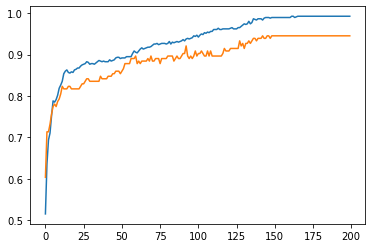

In [76]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])

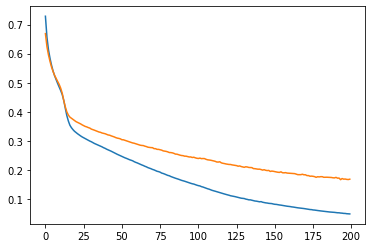

In [77]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])

# Model Evaluation

In [79]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 997us/step - loss: 0.1470 - accuracy: 0.9756


[0.14700327813625336, 0.9756097793579102]

In [91]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted>0.5

Text(15.0, 0.5, 'Actual')

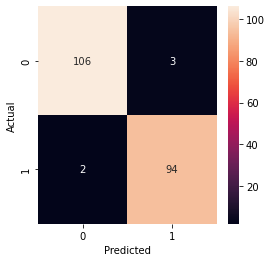

In [94]:
plt.figure(figsize=(4,4))
sns.heatmap(tf.math.confusion_matrix(Y_test, y_predicted), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')